### Student Information
Name: 張宜榛 (Yi-Chen, Chang)

Student ID: 109065703

GitHub ID: yakachang

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# Begin Assignment Here

# First Part of Homework

Please refer to the link [DM2021-Lab1-master.ipynb](https://github.com/yakachang/DM2021-Lab1-master/blob/main/DM2021-Lab1-master.ipynb)

If you want to see the whole repository, you can click this link [DM2021-Lab1-master](https://github.com/yakachang/DM2021-Lab1-master.git)

-------

# Second Part of Homework

**Step 1**: Download the the new dataset from website https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#\
\
**Step 2**: Data Transformation
- Use `pd.read_csv` to convert `.txt` file into Pandas dataframe\
[Reference] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- Use `pd.concat` to concat three datasets

**Step 3**: Modify the helper functions

### Improvement 1: Rewrite function tokenize_text() in helper
- transform all words to lowercase
- Ignore non-word characters
- Ignore word in stopwords

In [1]:
import pandas as pd
import helpers.data_mining_helpers as dmh   # Custom module

### Improvement 2: Utilize Dict to record the three data to make it easy to use

You can see more information about the dict in the Fifth part of this Homework.

In [2]:
# Step 2: Data Transformation

df_amazon = pd.read_csv('sentiment-labelled-sentences/amazon_cells_labelled.txt', sep='\t', names=['text','score'])
df_imdb = pd.read_csv('sentiment-labelled-sentences/imdb_labelled.txt', sep='\t', names=['text','score'])
df_yelp = pd.read_csv('sentiment-labelled-sentences/yelp_labelled.txt', sep='\t', names=['text','score'])
df_all = pd.concat([df_imdb,df_amazon, df_yelp])

df_dict = {
    'data': [df_amazon, df_imdb, df_yelp, df_all],
    'dataset_name': ['df_amazon', 'df_imdb', 'df_yelp', 'df_all']
}

for name, data in zip(df_dict['dataset_name'], df_dict['data']):
    print('{:10s}: {}'.format(name, data.shape))

df_amazon : (1000, 2)
df_imdb   : (748, 2)
df_yelp   : (1000, 2)
df_all    : (2748, 2)


**Step 4.1**: Dealing with Missing Values\
As we can see, there is no missing value among three datasets.

In [3]:
# Check there exist missing value in the dataset or not.
for name, data in zip(df_dict['dataset_name'], df_dict['data']):
    print('{:10s}:'.format(name))
    print(data.isnull().apply(lambda x: dmh.check_missing_values(x)))
    print('-' * 80)

df_amazon :
                                 text                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0
--------------------------------------------------------------------------------
df_imdb   :
                                 text                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0
--------------------------------------------------------------------------------
df_yelp   :
                                 text                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0
--------------------------------------------------------------------------------
df_all    :
                                 text      

**Step 4.2**: Dealing with Duplicate Data
1. As you can tell, there are duplicated data in all of our datasets\
   Furthermore, there are 10 duplicated data in `df_amazon`, 3 in `df_imdb`, and 4 in `df_yelp`.
2. There are several ways to deal with this problem. Here, I decided to keep the first data among duplicated data.\
   [Reference] https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#duplicate-data

In [4]:
for name, data in zip(df_dict['dataset_name'], df_dict['data']):
    print('{:10s}:{}'.format(name, sum(data.duplicated())))
    print('-' * 80)

df_amazon :10
--------------------------------------------------------------------------------
df_imdb   :3
--------------------------------------------------------------------------------
df_yelp   :4
--------------------------------------------------------------------------------
df_all    :17
--------------------------------------------------------------------------------


In [5]:
# Keep the first data among duplicated data

for name, data in zip(df_dict['dataset_name'], df_dict['data']):
    data.drop_duplicates(keep='first', inplace=True)
    print('{:10s}: {}'.format(name, len(data)))

df_amazon : 990
df_imdb   : 745
df_yelp   : 996
df_all    : 2731


### **Step 5**: Data Preprocessing

**5.1 Sampling**

Sampling from each datasets and all datasets.\
Show the score distribution of them.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df_dict['sample'] = []

for name, data in zip(df_dict['dataset_name'], df_dict['data']):
    df_dict['sample'].append(data.sample(n=100))

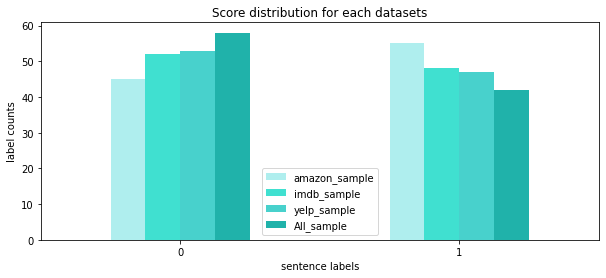

In [8]:
df = pd.DataFrame({"amazon_sample":df_dict['sample'][0]['score'].value_counts(), \
                   "imdb_sample":df_dict['sample'][1]['score'].value_counts(), \
                   "yelp_sample":df_dict['sample'][2]['score'].value_counts(), \
                   "All_sample":df_dict['sample'][3]['score'].value_counts()})
                   
ax = df.plot(kind='bar', 
             color=["paleturquoise","turquoise",'mediumturquoise','lightseagreen'], 
             rot=0, 
             title="Score distribution for each datasets", 
             xlabel='sentence labels', 
             ylabel='label counts',
             figsize = (10,4))
plt.show()

### **Step 5**: Data Preprocessing

**5.2 Feature Creation**

Do NLP tokenization by utilizing `nltk` package

In [9]:
import nltk

In [10]:
# dict_keys(['data', 'dataset_name', 'sample', 'unigrams'])
for data in df_dict['data']:
    data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))


df_dict['data'][0]['unigrams']

0                   [way, plug, us, unless, go, convert]
1                              [good, case, excel, valu]
2                                        [great, jawbon]
3      [tie, charger, convers, last, minutesmajor, pr...
4                                           [mic, great]
                             ...                        
995       [screen, get, smudg, easili, touch, ear, face]
996                      [piec, junk, lose, call, phone]
997                                [item, match, pictur]
998          [thing, disappoint, infra, red, port, irda]
999                    [answer, call, unit, never, work]
Name: unigrams, Length: 990, dtype: object

### **Step 5**: Data Preprocessing

**5.3 Feature subset selection**

`Word Frequency Count` and `TF-IDF`

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [12]:
for data in df_dict['data']:
    data['unigrams'] = data['unigrams'].apply(lambda x: ' '.join(x))

In [13]:
tfidf_vectorize = TfidfVectorizer()
tfidf = tfidf_vectorize.fit_transform(df_dict['data'][3]['unigrams'])

tfidf_vectorize.get_feature_names_out()[0:10]

array(['aailiyah', 'abandon', 'abhor', 'abil', 'abl', 'abound',
       'abovepretti', 'abroad', 'absolut', 'absolutel'], dtype=object)

In [14]:
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(df_dict['data'][3]['unigrams'])

count_vect.get_feature_names_out()[0:10]

array(['aailiyah', 'abandon', 'abhor', 'abil', 'abl', 'abound',
       'abovepretti', 'abroad', 'absolut', 'absolutel'], dtype=object)

In [15]:
import seaborn as sns

### Improvement 4: Rewrite the code for ploting the data_counts to make it run faster

In [16]:
"""Slower Version"""

# data_counts = count_vect.fit_transform(df_dict['data'][3]['unigrams'])

# plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
# plot_y = ["doc_"+ str(i) for i in list(df_all.index)]
# plot_z = data_counts[0:len(plot_y), 0:len(plot_x)].toarray()

# df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# plt.subplots(figsize=(18, 20))
# ax = sns.heatmap(df_todraw,
#                  cmap="PuRd",
#                  vmin=0, vmax=1, annot=True)

'Slower Version'

In [17]:
df_todraw = pd.DataFrame(tfidf.toarray(), columns = tfidf_vectorize.get_feature_names_out())
df_todraw

,aailiyah,abandon,abhor,abil,abl,abound,abovepretti,abroad,absolut,absolutel,...,yukon,yum,yummi,yun,z500a,zero,zillion,zombi,zombiestud,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
keep_data = df_todraw.max()>0.9     # remain 74 columns
df_todraw = df_todraw[df_todraw.columns[keep_data.values==True]]
df_todraw

,aggrav,avoid,aw,awesom,back,bewar,blew,bore,brilliant,check,...,thumb,transfer,truli,wait,want,wast,windresist,work,worth,worthwhil
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2727,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2728,0.0,0.0,0.0,0.0,0.405525,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2729,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


(30, 82)


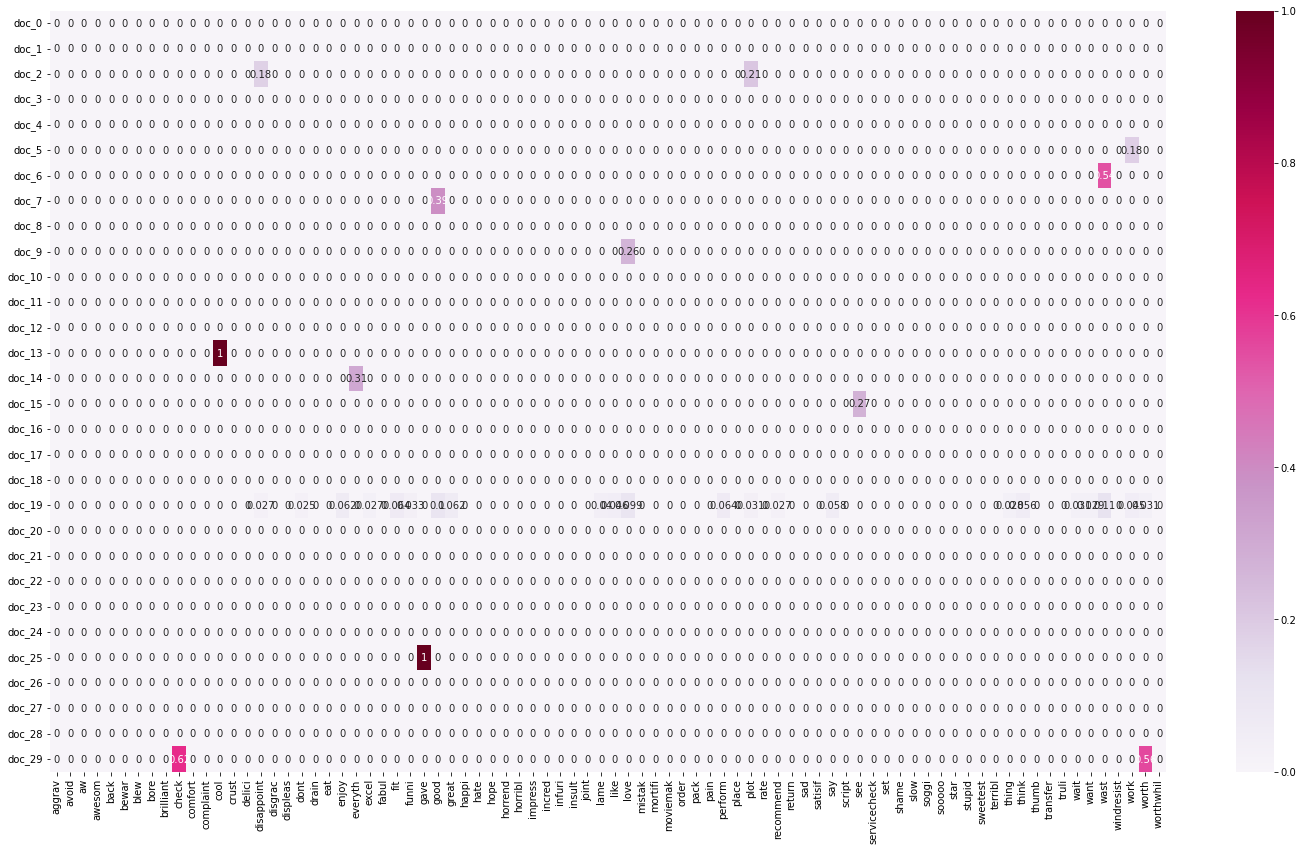

In [19]:
df_todraw = pd.DataFrame(tfidf.toarray(), columns = tfidf_vectorize.get_feature_names_out())

keep_data = df_todraw.max()>=0.9
df_todraw = df_todraw[df_todraw.columns[keep_data.values==True]]
df_todraw = df_todraw[:30]

for idx, term in enumerate(df_todraw.columns):
    df_todraw.rename({idx : f'doc_{idx}'}, axis=0, inplace=True)
    df_todraw.rename({term : f'{term}'}, axis=1, inplace=True)
    
print(df_todraw.shape)

df_todraw
plt.subplots(figsize=(25, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **Step 5**: Data Preprocessing

**5.4 Dimension Reduction**

In [20]:
from sklearn.decomposition import PCA
import numpy as np

In [21]:
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
data_reduced.shape

(2731, 2)

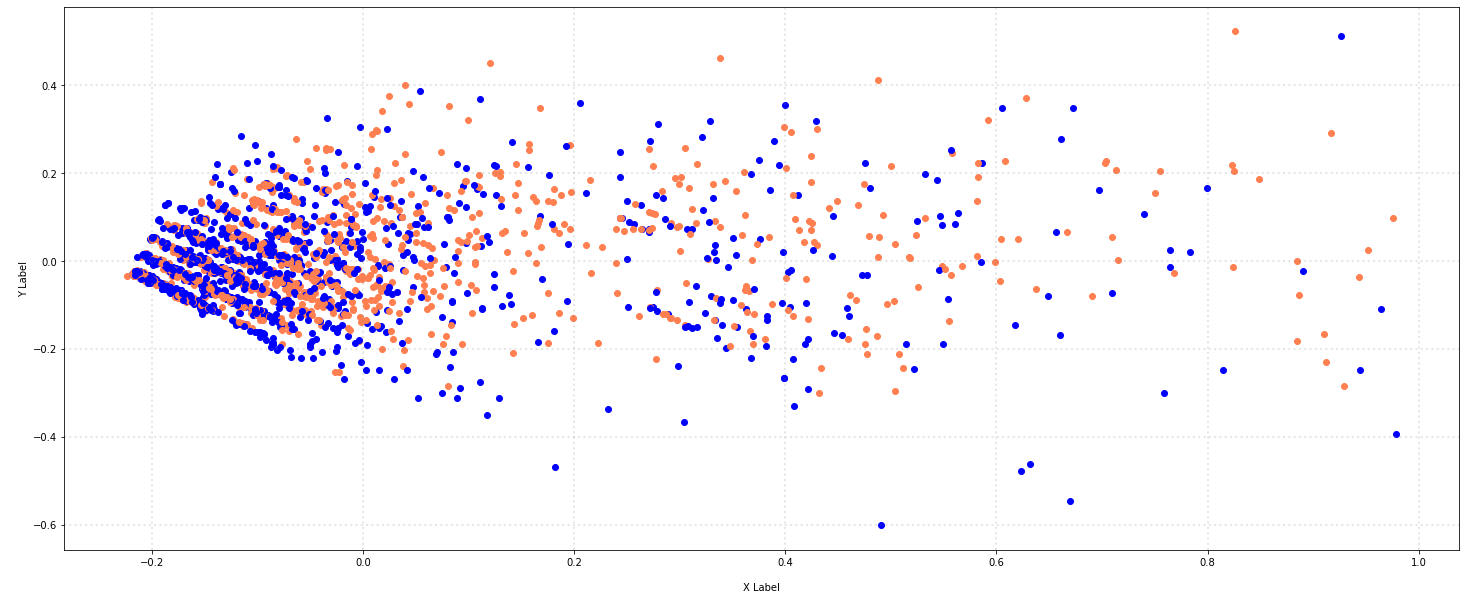

In [22]:
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for idx, item in enumerate(data_reduced):
    xs, ys = item
    if abs(xs)<1 and abs(ys)<1:
        color = 'coral' if df_all['score'].values[idx]==1 else 'blue'
        ax.scatter(xs, ys, c=color, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [23]:
data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())
data_reduced.shape

(2731, 3)

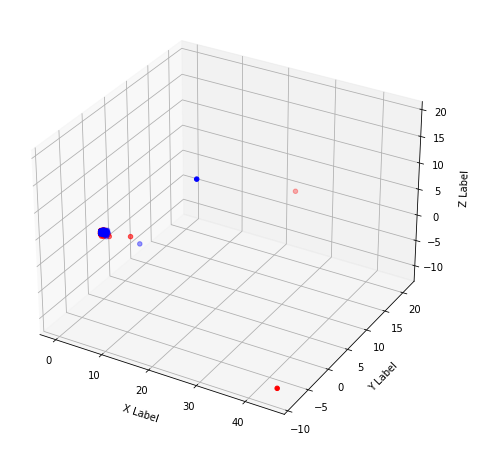

In [24]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

color = ['red', 'blue']
labels = [0, 1]

for c, label in zip(color, labels):
    xs = data_reduced[df_all['score'] == label].T[0]
    ys = data_reduced[df_all['score'] == label].T[1]
    zs = data_reduced[df_all['score'] == label].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### Step 5: Data Preprocessing

**5.5 Attribute Transformation / Aggregation**

In [25]:
# Slower version to generate term_frequency

term_frequencies = []
for j in range(0, data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

In [26]:
# Faster version to generate term_frequency

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
term_frequencies[0]

1

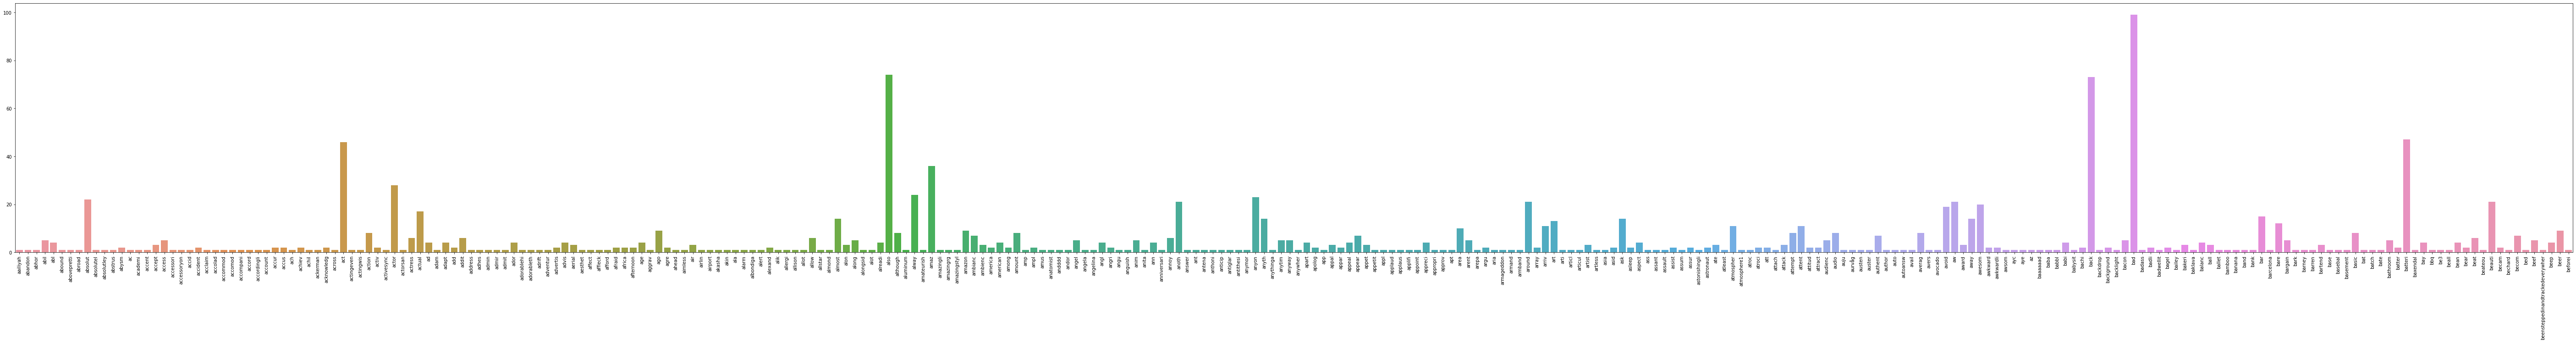

In [27]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### Improvement 5: Sort term_frequency at first, so that we can clearly know the words with high frequencies and the words with low frequencies.

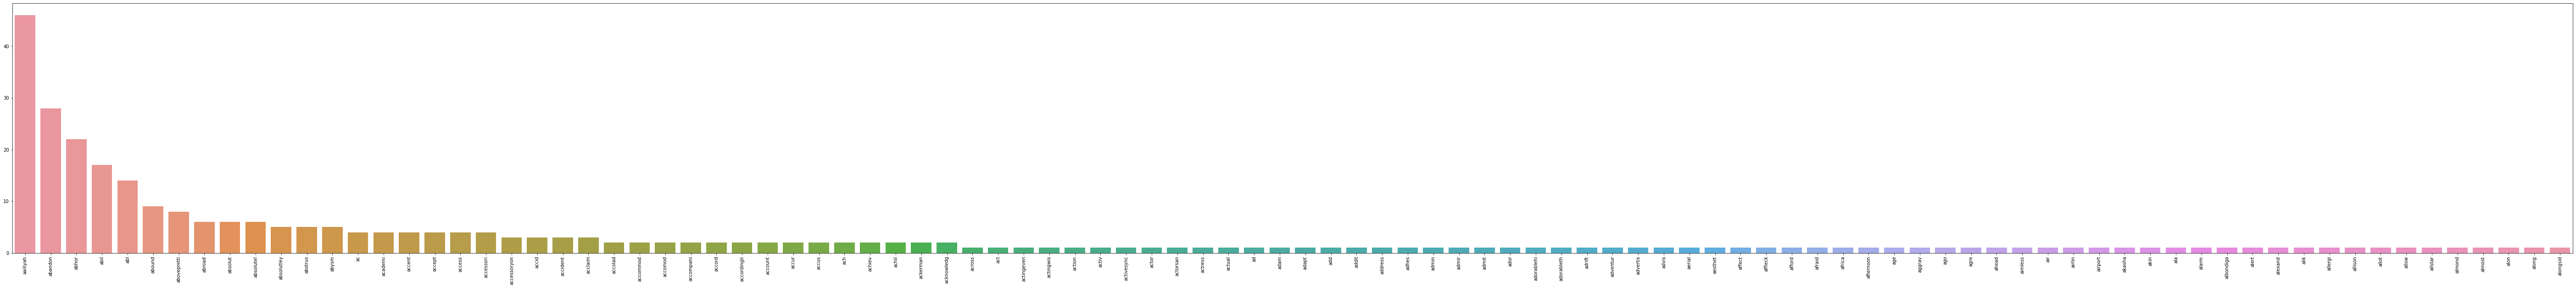

In [28]:
plt.subplots(figsize=(100, 10))

x_ndarray = count_vect.get_feature_names_out()[:100]
y_ndarray = term_frequencies[:100]

x_list = x_ndarray.tolist()
y_list = y_ndarray.tolist()

y_list, x_list = zip(*sorted(zip(y_list, x_list), reverse=True))

g = sns.barplot(x=np.array(x_list), 
                y=np.array(y_list))
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

### Improvement 3: Use module `plotly` instead of `matplotlib` to display the result.

In [29]:
import plotly.graph_objects as go

In [30]:
fig = go.Figure(
    data=[go.Bar(x=count_vect.get_feature_names_out()[:300], 
                 y=term_frequencies[:300])],
    layout_title_text="A Figure Displayed Document frequency"
)

fig.show()

In [31]:
x_list = []
y_list = []
for x, y in zip(count_vect.get_feature_names_out(), term_frequencies):
    if y > 80:                  # Length is 21
        x_list.append(x)
        y_list.append(y)

fig = go.Figure(
    data=[go.Bar(x=x_list, 
                 y=y_list)],
    layout_title_text="A Figure Displayed Document frequency"
)

fig.show()

In [32]:
# Notice: You should zoom in to see more clearly

term_frequency_list = [(x, y) for x, y in zip(count_vect.get_feature_names_out(), term_frequencies)]


term_frequency_sorted_list = sorted(term_frequency_list, key=lambda x: x[1], reverse=True)

x_list, y_list = list(zip(*term_frequency_sorted_list))

fig = go.Figure(
    data=[go.Bar(x=x_list, 
                 y=y_list)],
    layout_title_text="A Figure Displayed Document frequency"
)

fig.show()

### **Step 6**: Data Exploration

In [33]:
document_to_transform_1 = []
random_record_1 = df_all.iloc[0]
random_record_1 = random_record_1['unigrams']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_all.iloc[4]
random_record_2 = random_record_2['unigrams']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_all.iloc[20]
random_record_3 = random_record_3['unigrams']
document_to_transform_3.append(random_record_3)

In [34]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['slowmov aimless movi distress drift young man']
['best scene movi gerardo tri find song keep run head']
['first movi ive given year']


In [35]:
from sklearn.preprocessing import binarize

In [36]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [37]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.119523
Cosine Similarity using count bw 1 and 3: 0.169031
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


------

# Third Part of Homework

## 1. Generate meaningful new data visualizations

### (1) Do word frequency count to all dataset separately.

In [39]:
df_dict['count_vect'] = []
df_dict['data_counts'] = []
# count_vect_list = []

for idx, data in enumerate(df_dict['data']):
    df_dict['count_vect'].append(CountVectorizer())
    df_dict['data_counts'].append(df_dict['count_vect'][idx].fit_transform(df_dict['data'][idx]['unigrams']))
    print(df_dict['dataset_name'][idx], end = ": ")
    print(df_dict['count_vect'][idx].get_feature_names_out()[0:10])

df_amazon: ['abhor' 'abil' 'abl' 'abound' 'abovepretti' 'absolut' 'absolutel' 'ac'
 'accept' 'access']
df_imdb: ['aailiyah' 'abandon' 'abil' 'abroad' 'absolut' 'abstrus' 'abysm'
 'academi' 'accent' 'access']
df_yelp: ['absolut' 'absolutley' 'accid' 'accommod' 'accomod' 'accordingli'
 'account' 'ach' 'acknowledg' 'across']
df_all: ['aailiyah' 'abandon' 'abhor' 'abil' 'abl' 'abound' 'abovepretti' 'abroad'
 'absolut' 'absolutel']


### (2) Plot dataset separately after reducting dimension to 2

df_amazon
shape (990, 2)


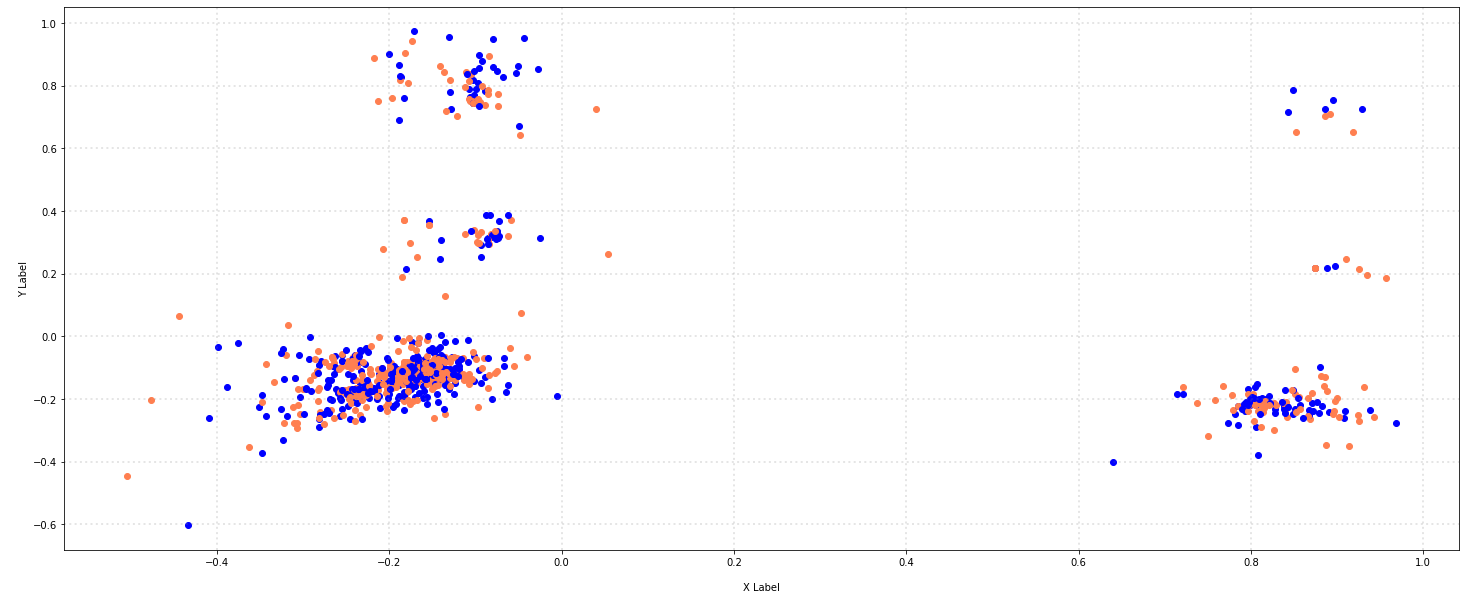

df_imdb
shape (745, 2)


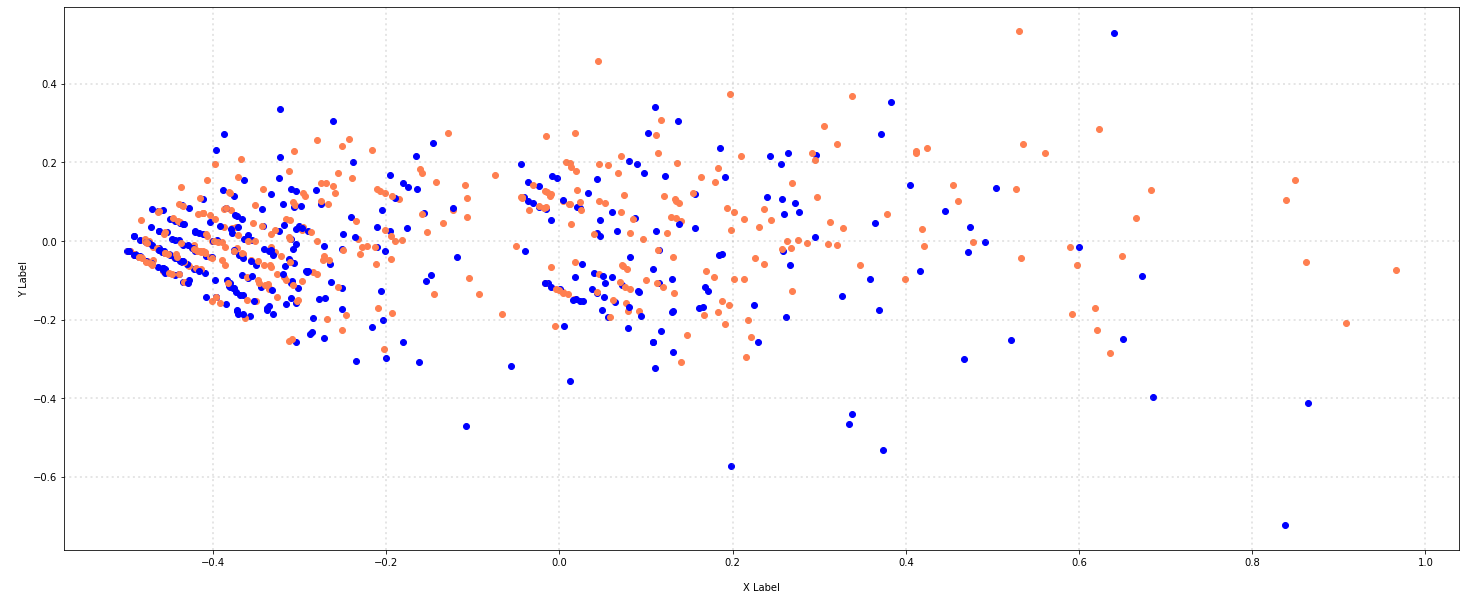

df_yelp
shape (996, 2)


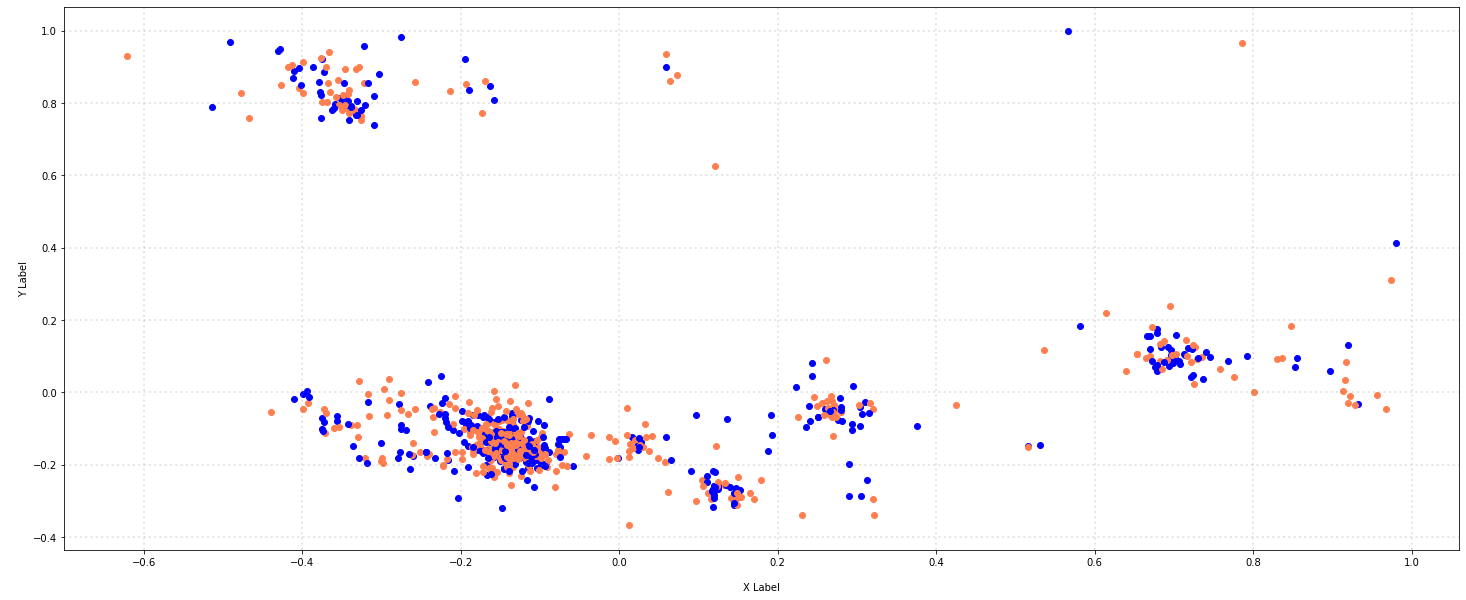

df_all
shape (2731, 2)


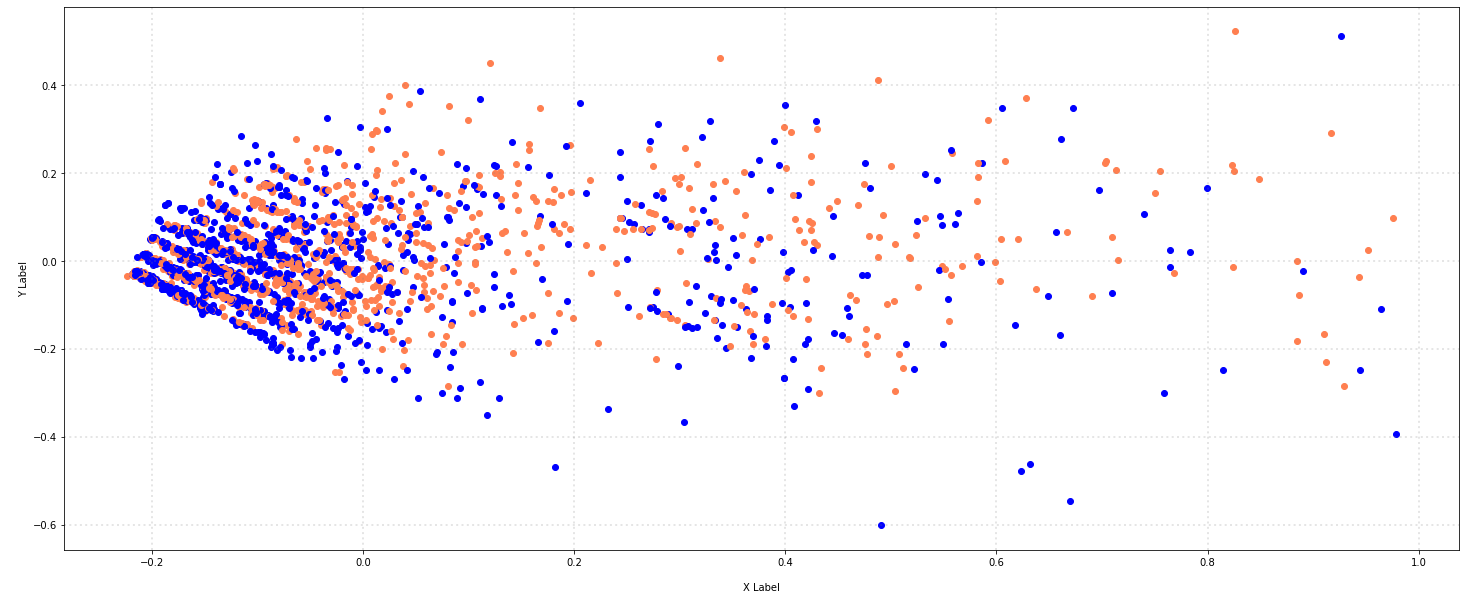

In [40]:
for idx, data_count in enumerate(df_dict['data_counts']):
    data_reduced = PCA(n_components = 2).fit_transform(data_count.toarray())
    print(df_dict['dataset_name'][idx])
    print("shape", data_reduced.shape)

    # plot
    fig = plt.figure(figsize = (25,10))
    ax = fig.subplots()

    for idx, item in enumerate(data_reduced):
        xs, ys = item
        if abs(xs)<1 and abs(ys)<1:
            color = 'coral' if df_all['score'].values[idx]==1 else 'blue'
            ax.scatter(xs, ys, c=color, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')

    plt.show()

### (3) See the top 10 words with high frequency for each dataset and all dataset.

In [41]:
df_dict['term_frequency'] = []

for idx, data_count in enumerate(df_dict['data_counts']):
    df_dict['term_frequency'].append(np.asarray(data_count.sum(axis=0))[0])

In [42]:
df_dict['term_frequency'] = []

for idx, (count_vect, data_count) in enumerate(zip(df_dict['count_vect'], df_dict['data_counts'])):
    df_dict['term_frequency'].append(np.asarray(data_count.sum(axis=0))[0])
    x_list = []
    y_list = []
    for x, y in zip(count_vect.get_feature_names_out(), df_dict['term_frequency'][idx]):
        x_list.append(x)
        y_list.append(y)

    y_list, x_list = zip(*sorted(zip(y_list, x_list), reverse=True))

    fig = go.Figure(
        data=[go.Bar(x=x_list[:10], 
                     y=y_list[:10])],
        layout_title_text="A Figure Displayed Document frequency for " + df_dict['dataset_name'][idx]
    )

    fig.show()

### (4) See the result of reducting dimensionality to 3 from three different angle for all dataset.

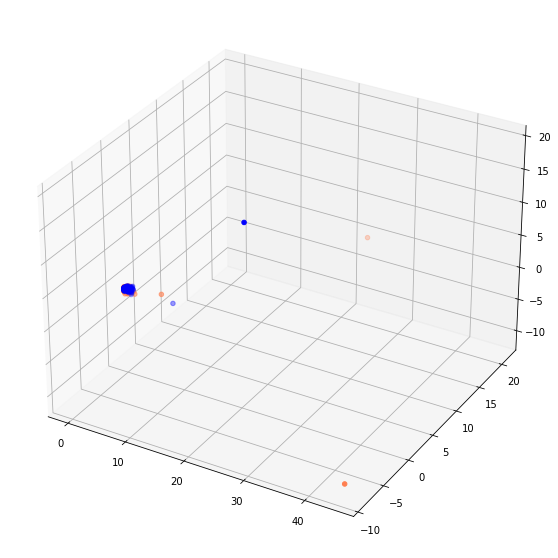

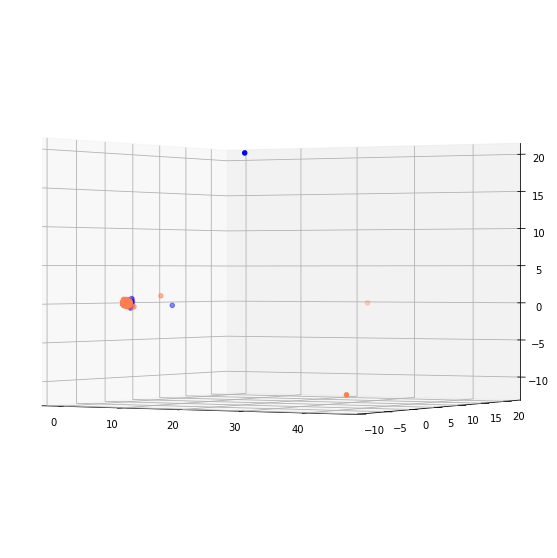

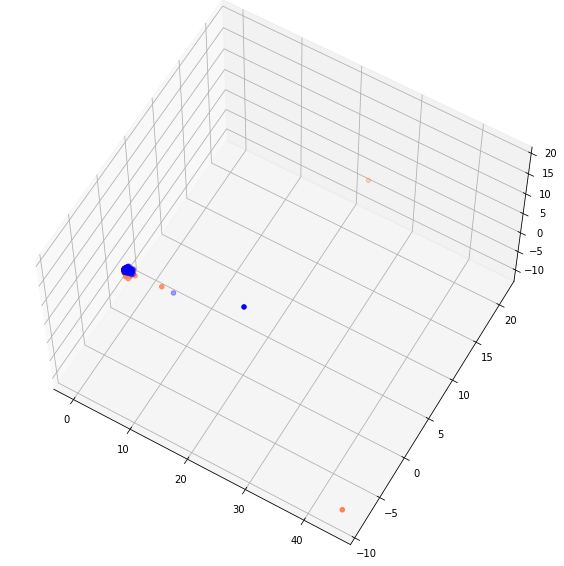

In [43]:
# [Reference] https://stackoverflow.com/questions/12904912/how-to-set-camera-position-for-3d-plots-using-python-matplotlib

data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())
data_reduced.shape

color = ['coral', 'blue']

for azim, dist, elev in  [(-60, 10, 30), (-60, 10, 0), (-60, 10, 60)]:
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')

    for c, label in zip(color, labels):
        xs = data_reduced[df_all['score'] == label].T[0]
        ys = data_reduced[df_all['score'] == label].T[1]
        zs = data_reduced[df_all['score'] == label].T[2]
    
        ax.scatter(xs, ys, zs, c = c, marker='o')
    
    ax.view_init(elev=elev, azim=azim)
    plt.show()

## 2. Generate TF-IDF features

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [45]:
tfidf_vectorize = TfidfVectorizer()
tfidf = tfidf_vectorize.fit_transform(df_dict['data'][3]['unigrams'])

In [46]:
tfidf.shape

(2731, 4085)

In [47]:
tfidf_vectorize.get_feature_names_out()[0:10]

array(['aailiyah', 'abandon', 'abhor', 'abil', 'abl', 'abound',
       'abovepretti', 'abroad', 'absolut', 'absolutel'], dtype=object)

In [48]:
tfidf[0:5, 0:30].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Plot TF-IDF for each dataset and all dataset

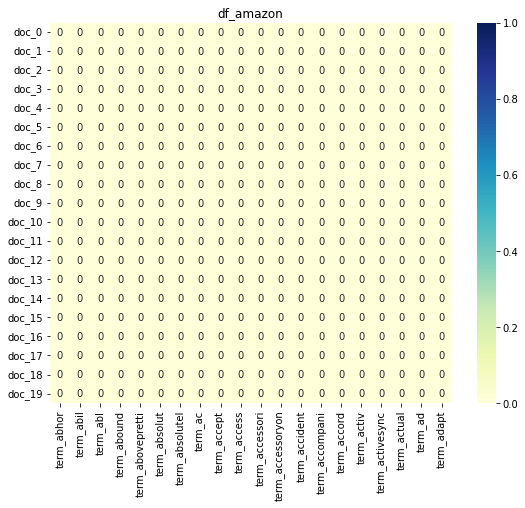

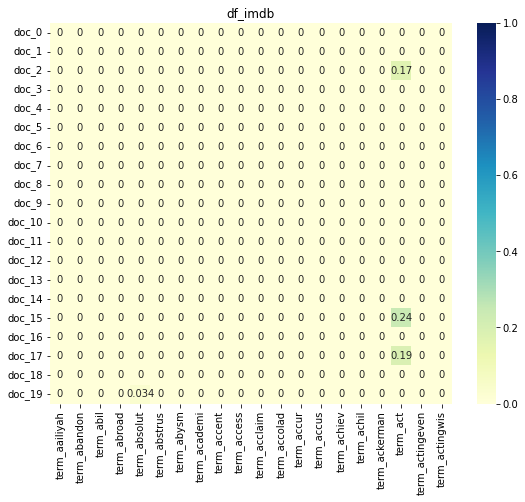

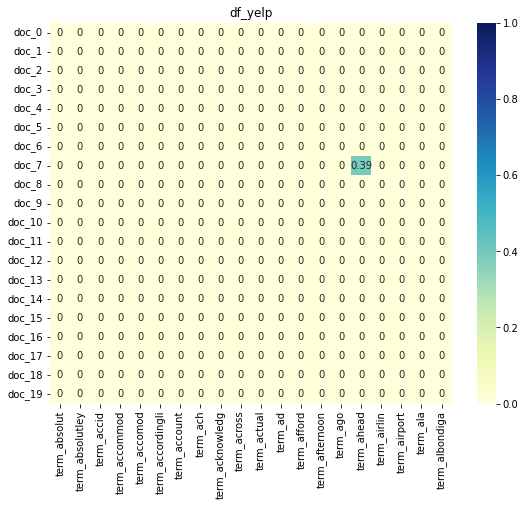

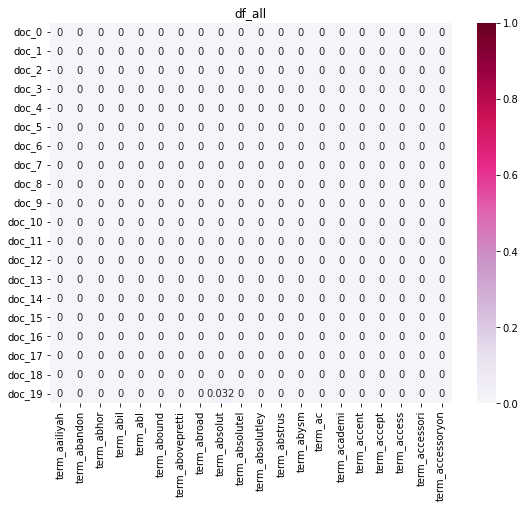

In [49]:
# [Reference] https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-and-axis-labels-to-seaborn-heatmap

color = ["YlGnBu", "YlGnBu", "YlGnBu", "PuRd"]

df_dict['tfidf_vectorize'] = []
df_dict['tfidf'] = []

for idx, data in enumerate(df_dict['data']):
    df_dict['tfidf_vectorize'].append(TfidfVectorizer())
    df_dict['tfidf'].append(df_dict['tfidf_vectorize'][idx].fit_transform(df_dict['data'][idx]['unigrams']))

    plot_x = ["term_"+str(i) for i in df_dict['tfidf_vectorize'][idx].get_feature_names_out()[0:20]]
    plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
    plot_z = df_dict['tfidf'][idx][0:20, 0:20].toarray()

    df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

    plt.subplots(figsize=(9, 7))

    ax = sns.heatmap(df_todraw,
                     cmap=color[idx],
                     vmin=0, vmax=1, annot=True)
    
    ax.set_title(df_dict['dataset_name'][idx])

## 3. Implement a simple Naive Bayes classifier
Use both the TF-IDF features and word frequency features to build two seperate classifiers.

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [51]:
model = MultinomialNB()
scores_tfidf = cross_val_score(estimator=model, 
                               X=tfidf, y=df_all['score'],
                               cv=10, scoring='accuracy')

print("score for tfidf: ", scores_tfidf.mean())

scores_counts = cross_val_score(estimator=model, 
                                X=data_counts, y=df_all['score'],
                                cv=10, scoring='accuracy')

print("score for counts: ", scores_counts.mean())

score for tfidf:  0.7964225555466431
score for counts:  0.7821475361621347


According to the result above, we know that the score of `TF-IDF` is higher than `Word Frequency Feature`.\
I think the reason is Word Frequency Feature only considers the frequency of words. \
TF-IDF not only consider the frequency, but also consider whether the word is meaningful. To speak precisely, words “a”, “an”, “the”, “of”, “in” have high frequencies but meaningless. Wikipedia says that TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. Thanks to the TF-IDF's term-weighting schemes, we can obtain better result.

------

# Forth Part of Homework
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade.

### Improvement 1: Rewrite function tokenize_text() in helper

If we utilize the original function to tokenize, we will obtain a lot of meaningless words, such as "00", "000", etc.\
Hence, I modified this function to have following functionalities:

- Transform all words to lowercase
- Ignore non-word characters
- Ignore word in stopwords

### Improvement 2: Utilize Dict to record the three data to make it easy to use

```
df_dict = {
    'data': list of DataFrame, 
    'dataset_name': list of dataset's name, 
    'sample': list of 100 data,
    'unigrams': list of tokens,
    'count_vect': list of count_vect of each dataset,
    'data_counts': list of data_count of each dataset,
    'term_frequency': list of term_frequency of each dataset,
    'tfidf_vectorize': list of tfidf_vectorize of each dataset,
    'tfidf': list of tfidf of each dataset
}
```

### Improvement 3: Rewrite the code for ploting the data_counts to make it run faster

### Improvement 4: Use module `plotly` instead of `matplotlib` to display the result.

Module `plotly` can draw a interactive 3D-plot. The user can rotate and zoom in or out to view every angle.\
However, users have to set manually to see the perspective they want to see by utilizing module `matplotlib`.

### Improvement 5: Sort term_frequency at first, so that we can clearly know the words with high frequencies and the words with low frequencies.